<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Snippets
</b></font> </br></p>



---

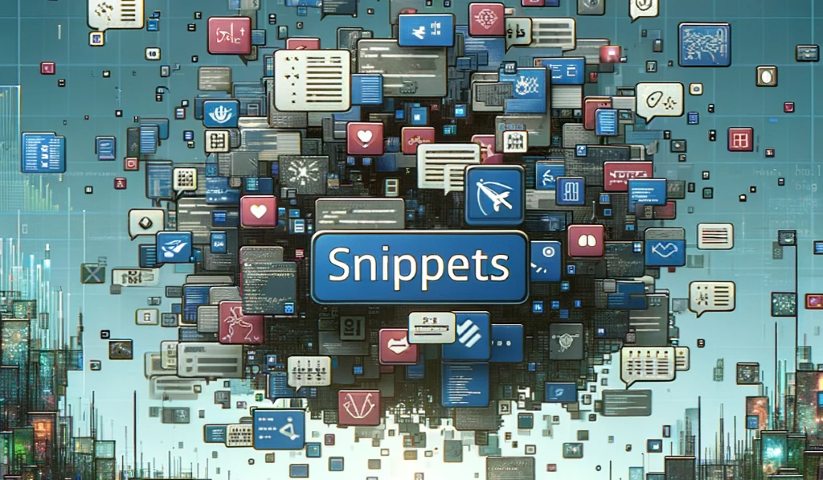

Bild mit DALL· E erstellt

# 1 | Understand

# 1.1 | Read DataSet

# 1.1a | Read OpenML


In [ ]:
data_id = 43406
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', target_column='default-target', data_id=data_id)

In [ ]:
data = df.data.copy()
target = df.target.copy()

# 1.1b | Read Github

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ralf-42/ml-kurs/main/02%20data/BodyPerformance.csv')

In [ ]:
label = 'class'
features = [n for n in df.columns if n != label]

target = df[label].copy()
data = df[features].copy()

# 1.1c | Read CSV

In [ ]:
import pandas as pd
filename = ''
df = pd.read_csv(filename, header=0)

In [ ]:
label = 'class'
features = [n for n in df.columns if n != label]

target = df[label].copy()
data = df[features].copy()

# 1.1d | Read Excel

In [ ]:
import pandas as pd
filename = ''
df = pd.read_excel(filename)

In [ ]:
label = 'class'
features = [n for n in df.columns if n != label]

target = df[label].copy()
data = df[features].copy()

# 1.1e | Read arff

In [ ]:
!pip install -q liac-arff
import arff
import pandas as pd

def read_arff_file(file_path):
    with open(file_path, 'r') as f:
        data_dict = arff.load(f)
    data = data_dict['data']
    df = pd.DataFrame(data)
    df.columns = [attr[0] for attr in data_dict['attributes']]
    return df

file_path = '/content/phpMYEkMl.arff'
df = read_arff_file(file_path)
print(df.head())

# 1.2 | EDA - Pandas

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.describe(include=object).T

In [ ]:
data.corr()

In [ ]:
col_name = ''
data.groupby(col_name).count()

In [ ]:
target.value_counts()

In [ ]:
# _ = data.hist(figsize=(15,15))
# _ = data.plot.scatter(x='length', y='width', c='DarkBlue')
# _ = pd.scatter_matrix(data[features])
# _ = pd.plotting.scatter_matrix(data, alpha=0.2, figsize=[15,15], c='darkblue')
# _ = data.boxplot(column=['age', 'pclass'], figsize=[10,10])

# 1.3 | EDA - Pandas Profiling

In [ ]:
!pip install -U -q pandas-profiling

Über Menü: Laufzeit | Sitzung neu starten   
oder   
Strg+M .   

GGf. müssen die Daten neu gelesen/importiert werden.

In [ ]:
# Import
import ydata_profiling
from ydata_profiling.utils.cache import cache_file

In [ ]:
# Inline Report
report = df.profile_report(sort=None, html={"style": {"full_width": True}},
                           title="<DateSet> Exploratory Data Analysis",
                           correlations={ "auto": {"calculate": True}, "pearson": {"calculate": True}},
                           progress_bar=False)
report

In [ ]:
# Als HTML-Datei speichern
profile_report = df.profile_report(html={"style": {"full_width": True}})
profile_report.to_file("example.html")

In [ ]:
# Mehr Analyse (Unicode) und Drucken vorhandener ProfileReport-Objekte inline
profile_report = df.profile_report(explorative=True, html={"style": {"full_width": True}})
profile_report

# 1.4 | EDA - SweetViz

In [ ]:
try:
  import sweetviz as sv
except:
  !pip install -q sweetviz
  import sweetviz as sv

In [ ]:
report = sv.analyze(data)
report.show_notebook()

In [ ]:
# comparison_report = sv.compare([data_train,'Train'], [data_test,'Test'], target_feat='class')
# comparison_report.show_notebook()

In [ ]:
# report.show_html('report.html')

# 1.5 | EDA - DataPrep

In [ ]:
try:
    from dataprep.eda import create_report, plot, plot_correlation, plot_missing, plot_diff
    from dataprep.clean.clean_headers import clean_headers
except:
    !pip install -q dataprep
    from dataprep.eda import create_report, plot, plot_correlation, plot_missing, plot_diff
    from dataprep.clean.clean_headers import clean_headers

In [ ]:
create_report(data)

In [ ]:
# clean_headers(data, case='camel', replace={'XXX': 'YYY'})     # Cleaning the header-names / feature-names
# plot(data)                  # Histogram for all feartures
# plot_missing(data)          # missing data
# plot_missing(data, "...")   # Impact of missing data
# plot_correlation(data)      # correlation
# plot(data, "...", "...")    # Relationship between two features
# plot(data, "...")           # Single feature

# 1.6 | EDA - Plotly

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# Boxplot
title_ = 'Titel-Text'
px.box(data[['col1', 'col2']], title=title_, width=600, height=600)

In [ ]:
# 3 Boxplots
title_ = 'col1'
box1 = px.box(data['col1'], title=title_, width=600, height=600)

title_ = 'col2'
box2 = px.box(data['col2'], title=title_, width=600, height=600)

title_ = 'col3'
box3 = px.box(data['col2], title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('col1', 'col2', 'col3'))

for trace in box1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in box2.data:
    fig.add_trace(trace, row=1, col=2)

for trace in box3.data:
    fig.add_trace(trace, row=1, col=3)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Box-Plots')

# Plot anzeigen
fig.show()'

In [ ]:
# Scattergramm
title_ = 'Titel-Text'
px.scatter(data, x='col1', y='col2', color='target', labels={"col1": "xxxx","col2": "yyyy"}, title=title_, width=1200, height=600)

In [ ]:
# Scatter Matrix
px.scatter_matrix(data, dimensions=data.columns, opacity=1)
# px.scatter_matrix(data, dimensions=data.columns, opacity=1, color=target)

In [ ]:
# Linie
px.line(data, x= 'col1', y='col2', width=800, height=400)

# 1.7 | EDA - PyGWalker

In [ ]:
try:
  import pygwalker as pyg
except:
  !pip install -q pygwalker
  import pygwalker as pyg

In [ ]:
pyg.walk(data)

# 1.8 | EDA - Yellowbrick

In [ ]:
from yellowbrick.target import class_balance
visualizer = class_balance(target, labels=["A", "B", "C", "D"])

# 1.9 | EDA - Seaborn

In [ ]:

import seaborn as sns
_ = sns.pairplot(df.frame, hue='X2urvived')

In [ ]:
# Count
_ = sns.countplot(x='Sex', hue='X2urvived', data=df.frame)

In [ ]:
# Box
_ = sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

In [ ]:
# SCatter
_ = sns.displot(penguins, x="flipper_length_mm", bins=20)

In [ ]:
# linear Regression
_ = sns.lmplot(x="total_bill", y="tip", data=tips);

In [ ]:
# Multi-Plots
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

# 2 | Prepare

# 2.1 | Datentypen

# 2.1.1 | Datentyp ermitteln




In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

In [ ]:
nom_col = []
ord_col = []

# 2.1.2 | Datentyp ändern

In [ ]:
df['column_name'] = df['column_name'].astype(int)
df['column_name'] = df['column_name'].astype(float)
df['column_name'] = df['column_name'].astype(bool)

# 2.2 | Daten löschen / umbenennen

# 2.2.1 | Spalten löschen

In [ ]:
# Löschen von Spalten
data.drop(['col1', 'col2'], axis='columns', inplace=True)

# 2.2.2 | Spalten umbenennen

In [ ]:
data.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
data.columns = ['new1', 'new2', 'new3', 'new4']
data.columns = data.columns.str.replace('old_char', 'new_char')

# 2.2.3 Zeilen löschen

In [ ]:
data.drop('Zeileninhalt', axis=0)


In [ ]:
# Datensätze mit Wert zwischne 1 und 10 löschen
data_new = data[~(data['col'] > 1) & (data['col'] < 10)].drop()

In [ ]:
# Positivauswahl!
print(data.shape)
data = data[data['sit and bend forward_cm'] <= 150.0]
data = data[data['weight_kg'] > 34]
data = data[data['body fat_%'] < 60]
# Filtern von 'target' basierend auf den verbleibenden Indizes von 'data'
target = target.loc[data.index]
data.shape

In [ ]:
# Negativauswahl!
print(data.shape)
data.drop(data[data['col1'] > 150].index, inplace=True)
data.drop(data[data['col2'] <= 34].index, inplace=True)
# Filtern von 'target' basierend auf den verbleibenden Indizes von 'data'
target = target.loc[data.index]
data.shape

In [ ]:
# Löschen nach der Box-Plot Logik für eine Spalte
import pandas as pd
import numpy as np

column = 'col1'

# Berechne das erste und dritte Quartil (25% und 75% Quantile)
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)

# Berechne den Interquartilsabstand (IQR)
IQR = Q3 - Q1

# Definiere Grenzwerte für Ausreißer
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtere die Ausreißer heraus und aktualisiere 'data'
data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filtere 'target' basierend auf den verbleibenden Indizes in 'data'
target = target.loc[data.index]

In [ ]:
# Löschen nach der Box-Plot Logik für mehrere Spalten
import pandas as pd
import numpy as np

columns = ['col1', 'col2', 'col3']  # Ersetzen Sie dies mit Ihren Spaltennamen

# Initialisiere einen Filter, der anfangs alle Zeilen als True markiert
filter = pd.Series([True] * len(data), index=data.index)

for column in columns:
    # Berechne das erste und dritte Quartil (25% und 75% Quantile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Berechne den Interquartilsabstand (IQR)
    IQR = Q3 - Q1

    # Definiere Grenzwerte für Ausreißer
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update den Filter für die aktuelle Spalte
    filter = filter & (data[column] >= lower_bound) & (data[column] <= upper_bound)

# Wende den Filter auf 'data' an
data = data[filter]

# Filtere 'target' basierend auf den verbleibenden Indizes in 'data_filtered'
target = target.loc[data.index]

# 2.3 | Missing Values

# 2.3.1 | Prüfen auf Missing Values

In [ ]:
# --- Berechne die Anzahl der fehlenden Werte pro Spalte
data.isna().sum()

# 2.3.2 | Python Standard

In [ ]:
# --- Entferne Zeilen mit fehlenden Daten
data.dropna(inplace=True)
# --- Ersetze durch Mittelwert, Median, Mode
data['A'].replace([numpy.nan], data['A'].mean(), inplace=True)
data['B'].replace([numpy.nan], data['B'].median(), inplace=True)
data['C'].replace([numpy.nan], data['C'].mode()[0], inplace=True)
# --- Ersetze durch Vorgänger/Nachfolger
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)
# --- Ersetze durch Konstante -999
data.fillna(value=-999, inplace=True)


# 2.3.3 | SciKit-Learn

In [ ]:
mv = data.isnull().sum()
mv_col = list(mv[mv > 0].index)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
missing_data = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[mv_col] = pd.DataFrame(missing_data.fit_transform(data[mv_col]), columns=mv_col)

# 2.4 | Codierung & Skalierung

# 2.4.1 | Suchen & Ersetzen

In [ ]:
data.col.replace(['alt'], ['neu'], inplace = True)

# 2.4.2 | Ordinal Encoder

In [ ]:
# Die Behandlung der resultierenden Codierung als numerisches Merkmal führt zu einer willkürlich
# geordneten Werten und daher typischerweise zu einer geringeren Vorhersageleistung,
# wenn sie als Vorverarbeitung für einen Klassifikator oder Regressor verwendet wird.
#
from sklearn.preprocessing import OrdinalEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

In [ ]:
# Besser ...
from sklearn.preprocessing import OrdinalEncoder
cat_seq = [['low', 'medium', 'high'],['first', 'second', 'third']]  # Beispiel mit 2 Sequenzen
data[cat_col] = OrdinalEncoder(categories=cat_seq).fit_transform(data[cat_col])

In [ ]:
data.col.replace(['yes', 'no'], [1, 0], inplace = True)

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Bespiel mit Reihenfolge</font> </br></p>
from sklearn.preprocessing import OrdinalEncoder

# Angenommen, dies sind Ihre Schulnoten
grades = [['sehr gut'], ['gut'], ['mangelhaft']]

# Erstellen des Encoders, wobei die Reihenfolge der Noten festgelegt wird
encoder = OrdinalEncoder(categories=[['sehr gut', 'gut', 'befriedigend', 'ausreichend', 'mangelhaft', 'ungenügend']])

# Anpassen und Transformieren der Daten
ordinal_grades = encoder.fit_transform(grades)

print(ordinal_grades)

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Beispiel ohne Reihenfolge</font> </br></p>
from sklearn.preprocessing import OrdinalEncoder

# Angenommen, dies sind Ihre Schulnoten
grades = [['sehr gut'], ['gut'], ['mangelhaft']]

# Erstellen des Encoders, wobei die Reihenfolge der Noten NICHT festgelegt wird
encoder = OrdinalEncoder()

# Anpassen und Transformieren der Daten
ordinal_grades = encoder.fit_transform(grades)

print(ordinal_grades)

# 2.4.3 | Nominal Encoder

In [ ]:
nom_col = ['Sex','Embarked']
data = pd.concat([data, pd.get_dummies(data, columns=nom_col, prefix_sep='_')], axis='columns')
data.drop(columns=nom_col, inplace=True)

In [ ]:
nom_col = ['Sex','Embarked']
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
data = pd.concat([data, pd.DataFrame(ohe.fit_transform(data[nom_col]), columns=ohe.get_feature_names_out())], axis=1)
data.drop(columns=nom_col, inplace=True)

In [ ]:
data.col.replace(['yes', 'no'], [1, 0], inplace = True)

# 2.4.4 |  Target Encoder (nominal)

In [ ]:
# ab sklearn 1.3.2; aktuell Colab 1.2.2
#
from sklearn.preprocessing import TargetEncoder
data[nom_col] = TargetEncoder().fit_transform(data[nom_col], target)

In [ ]:
data.col.replace(['yes', 'no'], [1, 0], inplace = True)

# 2.4.5 | LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
target = LabelEncoder().fit_transform(target)

In [ ]:
target.replace(['yes', 'no'], [1, 0], inplace = True)

# 2.4.6 | Normalisieren

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data[num_col] = MinMaxScaler().fit_transform(data[num_col])

# 2.4.7 | Standardisieren

In [ ]:
from sklearn.preprocessing import StandardScaler
data[num_col] = StandardScaler().fit_transform(data[num_col])

# 2.4.8 | RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
data[num_col] = RobustScaler ().fit_transform(data[num_col])

# 2.4.9 | C&S Instanzen/Objekte

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
coder = OrdinalEncoder()
data[cat_col] = coder.fit_transform(data[cat_col])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_col] = scaler.fit_transform(data[num_col])

In [ ]:
cube[cat_col] = coder.inverse_transform(cube[cat_col])
cube[num_col] = scaler.inverse_transform(cube[num_col])

# 2.5 | Outlier

# 2.5.1 | Outlier via Standardabweichung
Mehr als 3 Standardabweichungen vom Mittelwert entfernt

In [ ]:
# Entferne Datenpunkte, die mehr als 3 Standardabweichungen vom Mittelwert entfernt sind (z-score normalization )
# Dies basiert auf der empirischen Regel (oder 68-95-99,7-Regel), die besagt, dass fast alle Werte (99,7 %)
# innerhalb von drei Standardabweichungen vom Mittelwert einer Normalverteilung liegen.
#
data = data[(abs(data - data.mean()) / data.std() < 3)].drop()
target = target.loc[data.index]

# 2.5.2 |  Outlier via 1.5 IQR (Boxplot)


In [ ]:
# Löschen nach der Box-Plot Logik für eine Spalte
import pandas as pd
import numpy as np

column = 'col1'

# Berechne das erste und dritte Quartil (25% und 75% Quantile)
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)

# Berechne den Interquartilsabstand (IQR)
IQR = Q3 - Q1

# Definiere Grenzwerte für Ausreißer
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtere die Ausreißer heraus und aktualisiere 'data'
data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filtere 'target' basierend auf den verbleibenden Indizes in 'data'
target = target.loc[data.index]

In [ ]:
# Löschen nach der Box-Plot Logik für mehrere Spalten
import pandas as pd
import numpy as np

columns = ['col1', 'col2', 'col3']  # Ersetzen Sie dies mit Ihren Spaltennamen

# Initialisiere einen Filter, der anfangs alle Zeilen als True markiert
filter = pd.Series([True] * len(data), index=data.index)

for column in columns:
    # Berechne das erste und dritte Quartil (25% und 75% Quantile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Berechne den Interquartilsabstand (IQR)
    IQR = Q3 - Q1

    # Definiere Grenzwerte für Ausreißer
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update den Filter für die aktuelle Spalte
    filter = filter & (data[column] >= lower_bound) & (data[column] <= upper_bound)

# Wende den Filter auf 'data' an
data = data[filter]

# Filtere 'target' basierend auf den verbleibenden Indizes in 'data_filtered'
target = target.loc[data.index]

# 2.5.3 | Outlier via Winsorizing
Begrenzung min/max auf Grenze 5% und 95% Werte

In [ ]:
from scipy.stats.mstats import winsorize
# Begrenzung der Gültigkeit auf 5% - 95%, Anzahl bleibt erhalten, Werte <5% bzw. >95% werden auf Unter-/Obergrenze gesetzt
data[num_col] = winsorize(data[num_col].values, limits=[0.5, 0.5])
target = target.loc[data.index]

# 2.5.4 | Outlier via LOF

Der LocalOutlierFactor gibt ein Array zurück, in dem -1 für Ausreißer und 1 für Inlier steht.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Erstellen des LocalOutlierFactor-Modells
lof = LocalOutlierFactor(n_neighbors=5)

# Anwenden des Modells auf 'data'
outliers = lof.fit_predict(data[['colname']])  # Stellen Sie sicher, dass 'colname' ein DataFrame ist

# Zählen der Anzahl der Ausreißer
num_outliers = len(outliers[outliers == -1])
print("Anzahl der Ausreißer:", num_outliers)

# Filtere Daten, um nur Inlier zu behalten (outliers == 1)
data = data[outliers == 1]

# Filtere 'target' basierend auf den verbleibenden Indizes in 'data_no_outliers'
target = target.loc[data.index]

# 2.6 | Dimensionen reduzieren

# 2.6.1 | Linear Discriminant Analysis

In [ ]:
# - supervised
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_np = lda.fit_transform(data, target)

# Cube um lda erweitern
col_name = [("LDA" + str(i+1)) for i in range(lda_np.shape[1])]
lda_df = pd.DataFrame(lda_np, columns=col_name)
cube = pd.concat([cube, lda_df], axis=1)

In [ ]:
feature_weights = lda.coef_
df_feature_weights = pd.DataFrame(feature_weights,columns=columns, index=['class1', 'class2', ...])
df_feature_weights

In [ ]:
df_dfunction = pd.DataFrame(enumerate(explained_variance_ratios), columns=['Discr.-Function', 'expl. Variance'])
df_dfunction['Discr.-Function'] += 1
df_dfunction

In [ ]:
sum(explained_variance_ratios)

# 2.6.2 | Principal Component Analysis

In [ ]:
# - unsupervised
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
pca_np = pca.fit_transform(scale(data))

# Cube um pca erweitern
col_name = [("PCA" + str(i+1)) for i in range(pca_np.shape[1])]
pca_df = pd.DataFrame(pca_np, columns=col_name)
cube = pd.concat([cube, pca_df], axis=1)

In [ ]:
feature_weights = pca.components_.T
df_feature_weights = pd.DataFrame(feature_weights, columns=col_name, index=data.columns)
df_feature_weights

In [ ]:
df_pcfunction = pd.DataFrame(enumerate(pca.explained_variance_ratio_), columns=['PCA', 'Variance'])
df_pcfunction['PCA'] += 1
df_pcfunction['cum. Variance'] = df_pcfunction['Variance'].cumsum()
df_pcfunction

In [ ]:
sum(explained_variance)

In [ ]:
# --- shorty
from yellowbrick.features import pca_decomposition
visualizer = pca_decomposition(data, target)

# 2.7 | Imbalanced

# 2.7.1 | Upsampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
data_resampled, target_resampled = ros.fit_resample(data, target)

# 2.7.2 | Downsampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
data_resampled, target_resampled = rus.fit_resample(data, target)

# 2.7.3 | Klassen gewichten

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(target_train), target_train)
model.fit(data_train, data_train, class_weight=class_weights)


# 2.7.4 | SMOTE
(Synthetic Minority Over-sampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
data_resampled, target_resampled = smote.fit_resample(data, target)

# 2.7.5 | ADASYN
(Adaptive Synthetic Sampling)

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
data_resampled, target_resampled = ada.fit_resample(data, target)

# 2.8 | Duplikate

# 2.8.1 | Duplikate ermitteln

In [ ]:
duplicates = data[data.duplicated()]
print("Anzahl Duplicate: ", len(duplicates))
# print("Duplizierte Einträge:")
# print(duplicates)

# 2.8.2 | Duplikate löschen

In [ ]:
data.drop_duplicates(inplace=True)  # Parameter: subset - column name(s) for duplicate identification

# 3 | Modeling
---

# 3.1 | Data-Split

# 3.1.1 | Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42, stratify=target)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

# 3.1.2 | Train-Val-Test-Split

[train-val-test](https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c)

In [ ]:
from fast_ml.model_development import train_valid_test_split
data_train, target_train, data_valid, target_valid, data_test, target_test = train_valid_test_split(data, target)

# 3.2 | Special Splits

# 3.2.1 | Time-Series-Slices (np.array)

In [ ]:
import numpy as np

def sliding_window_dataset(raw_data, window_size, forecast_horizon):
    dataset = []
    targets = []

    for i in range(len(raw_data) - window_size - forecast_horizon + 1):
        window_slice = raw_data[i:i+window_size, :]
        dataset.append(window_slice)
        target_slice = raw_data[i+window_size:i+window_size+forecast_horizon, :]
        targets.append(target_slice)

    return np.array(dataset), np.array(targets)

def expanding_window_dataset(raw_data, window_size, forecast_horizon):
    dataset = []
    targets = []

    for i in range(window_size, len(raw_data) - forecast_horizon + 1):
        window_slice = raw_data[:i, :]
        dataset.append(window_slice)
        target_slice = raw_data[i:i+forecast_horizon, :]
        targets.append(target_slice)

    return np.array(dataset), np.array(targets)


In [ ]:
raw_data = np.array([[1, 2], [2, 4], [3, 6], [4, 8], [5, 10], [6, 12], [7, 14], [8, 16], [9, 18], [10, 20]])
window_size = 3
forecast_horizon = 2

sliding_dataset, sliding_targets = sliding_window_dataset(raw_data, window_size, forecast_horizon)
expanding_dataset, expanding_targets = expanding_window_dataset(raw_data, window_size, forecast_horizon)

print("Sliding Dataset shape:", sliding_dataset.shape)
print("Sliding Targets shape:", sliding_targets.shape)
print("Expanding Dataset shape:", expanding_dataset.shape)
print("Expanding Targets shape:", expanding_targets.shape)

# 3.2.2 | Time-Series-Slices (DataFrames)

In [ ]:
import numpy as np
import pandas as pd

def sliding_window_dataset(raw_data, window_size, forecast_horizon):
    dataset = []
    targets = []

    for i in range(len(raw_data) - window_size - forecast_horizon + 1):
        window_slice = raw_data.iloc[i:i+window_size]
        dataset.append(window_slice)
        target_slice = raw_data.iloc[i+window_size:i+window_size+forecast_horizon]
        targets.append(target_slice)

    return np.array(dataset), np.array(targets)

def expanding_window_dataset(raw_data, window_size, forecast_horizon):
    dataset = []
    targets = []

    for i in range(window_size, len(raw_data) - forecast_horizon + 1):
        window_slice = raw_data.iloc[:i]
        dataset.append(window_slice)
        target_slice = raw_data.iloc[i:i+forecast_horizon]
        targets.append(target_slice)

    return np.array(dataset), np.array(targets)

In [ ]:
import pandas as pd
import numpy as np

# Create a pandas DataFrame
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

window_size = 2
forecast_horizon = 1

sliding_dataset, sliding_targets = sliding_window_dataset(df, window_size, forecast_horizon)
expanding_dataset, expanding_targets = expanding_window_dataset(df, window_size, forecast_horizon)

print("Sliding Dataset shape:", sliding_dataset.shape)
print("Sliding Targets shape:", sliding_targets.shape)
print("Expanding Dataset shape:", expanding_dataset.shape)
print("Expanding Targets shape:", expanding_targets.shape)

# 3.3 | Modelle Klassifizierung

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

model = estimator()
model.fit(data_train, target_train)

# 3.4 | Modelle Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

model = estimator()
model.fit(data_train, target_train)

# 3.5 | Modelle MultiLayerPerceptron

# 3.5.1 | Modelle MultiLayerPerceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

model = estimator()
model.fit(data, target)

# 3.5.2 | Loss-Entwicklung

In [ ]:
import plotly.express as px
title_ = 'Loss-Entwicklung'
px.line(y=model.loss_curve_, title=title_, labels={'x':'Epochen', 'y':'Loss-Wert'}, width=800, height=400)

# 3.6 | Modelle Association

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

model = estimator()
model.fit(data, target)

# 3.6 | Modelle Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

model = estimator()
model.fit(data, target)

# 3.7 | Modelle Anomaly/Deviation

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from pyod.models.knn import KNN
from pyod.models.lof import LOF

model = estimator()
model.fit(data, target)

# 3.8 | Modelle Ensemble

# 3.8.1 | Stacking Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svc', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]

In [ ]:
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model.fit(data_train, target_train)

# 3.8.2 | Stacking Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50, max_features=5, max_depth=20, min_samples_leaf=5, random_state=42)),
    ('knn', KNeighborsRegressor(4)),
    ('lreg', LinearRegression())]

In [ ]:
model = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
model.fit(data_train, target_train)

# 3.9 | Pipeline - Full Scope

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Import & Konfiguration Pipeline
</font></p>

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# display models as diagrams
from sklearn import set_config
set_config(display='diagram')

<p><font color='black' size="5">
Missing Values & Codierung - Pipeline für kategoriale Features
</font></p>

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

cat_pipe = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(unknown_value=999, handle_unknown='use_encoded_value'))
    ])

<p><font color='black' size="5">
Missing Values & Skalierung - Pipeline für numerische Features
</font></p>

In [ ]:
from sklearn.preprocessing import StandardScaler
num_pipe = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    ])

<p><font color='black' size="5">
Verbinden der beiden Pipelines zu einem ColumnTransformer (parallele Verarbeitung)
</font></p>

In [ ]:
from sklearn.compose import ColumnTransformer
prepare_pipe = ColumnTransformer(transformers=[
      ('categorical', cat_pipe, cat_col),
      ('numerical', num_pipe, num_col)
      ])

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.30, shuffle=True, random_state=42)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

 <p><font color='black' size="5">
Modellauswahl, Verbinden Prepare- & Model-Pipeline, Training
</font>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [ ]:
model = Pipeline([
                  ('prepare', prepare_pipe),
                  ('feature_selection', SelectKBest(score_func=f_regression, k=6)),
                  ('tree', DecisionTreeRegressor(max_depth=4, min_samples_split=50)) ])

In [ ]:
model.fit(data_train, target_train)


<p><font color='black' size="5">
Analyse von Zwischenschritten einer Pipeline
</font></p>

In [ ]:
 # Konfiguration Pipeline 'prepare'
 model.named_steps.prepare

In [ ]:
# Mittelwerte der skalierten Features
pipe_prepare.named_transformers_['numerical'].named_steps['scaler'].mean_

In [ ]:
# Namen der 4 ausgewählten Features - in der Pipeline werden die Column-Names nicht durchgereicht!
model.named_steps['feature_selection'].get_feature_names_out()

In [ ]:
# Überführen in Column-Names
feature_index = model.named_steps['feature_selection'].get_feature_names_out()
index = [int(i[1:]) for i in feature_index]
feature_ = data.columns[index]
feature_

In [ ]:
# Anzahl der in DecisionTreeRegression verwendeten Features
model.named_steps['tree'].n_features_in_

# 4 | Evaluate
---

# 4.1 | Modellgüte Klassifikation

# 4.1.1 | Prognose

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

In [ ]:
# Prognose 2 neue Datensätze an das Modell übergeben
# new_data = { 'feat1': [1, 2], 'feat2': [0, 1], 'feat4': [33, 80], 'feat5': [0, 0], 'feat6': [0, 0] }
# new = pd.DataFrame(new_data)
# model.predict(new)

# 4.1.2 | Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(target_train, target_train_pred) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

In [ ]:
acc_test = accuracy_score(target_test, target_test_pred) * 100
print (f"Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}")

# 4.1.3 | Precision, Recall, F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(target_test, target_test_pred)
recall = recall_score(target_test, target_test_pred)
f1 = f1_score(target_test, target_test_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# 4.1.4 | Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target_test, target_test_pred)
display_labels_=['No','Yes']
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels_)
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target_test, target_test_pred, target_names=display_labels_))

# 4.1.5 | Cohen's Kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score
target_pred = model.predict(data_train)
cks_train = cohen_kappa_score(target_train, target_pred)
print (f"Modell: {model} -- Train -- Cohen's Kappa: {cks_train:5.2f}")

# 4.1.6 | ROC/AUC

In [ ]:
from yellowbrick.classifier import ROCAUC
classes_ = ['class1','class2']
visualizer = ROCAUC(model, classes=classes_)

In [ ]:
visualizer.fit(data_train, target_train)
visualizer.score(data_test, target_test)
visualizer.show()

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(model, X_train=data_train, y_train=target_train, X_test=data_test, y_test=target_test, classes=['No', 'Yes'])

# 4.1.7 | Discrimination Threshold


In [ ]:
# --- Quick Version mit Fehler
# from yellowbrick.classifier.threshold import discrimination_threshold
# discrimination_threshold(model, data, target)

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold
# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(model, random_state=42, n_trials=1 , exclude="queue_rate")
visualizer.fit(data_test, target_test, random_state=42)
visualizer.show()

In [ ]:
threshold = 0.45
new_target_pred = (model.predict_proba(data_test)[:,1]>= threshold).astype(int)
conf_matrix = confusion_matrix(target_test, new_target_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No','Yes'])
disp.plot(cmap='Blues')

# 4.1.8 | Class Prediction Error

In [ ]:
from yellowbrick.classifier import class_prediction_error
classes = ["A", "B", "C", "D", "E"]
class_prediction_error(model,data_train, target_train, data_test, target_test, classes=classes)

# 4.1.9 | TPR & FPR

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(target_test, target_test_pred).ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)


# 4.2. | Modellgüte Regression

# 4.2.1 | Prognose

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

In [ ]:
# Prognose 2 neue Datensätze an das Modell übergeben
# new_data = { 'feat1': [1, 2], 'feat2': [0, 1], 'feat4': [33, 80], 'feat5': [0, 0], 'feat6': [0, 0] }
# new = pd.DataFrame(new_data)
# model.predict(new)

# 4.2.2 | Bestimmtheitsmass - r2

In [ ]:
from sklearn.metrics import r2_score
r2_train = r2_score(target_train, target_train_pred)
print(f'Modell: {model}\n -- Train -- Bestimmtheitsmass: {r2_train:5.2f}' )

In [ ]:
r2_test = r2_score(target_test, target_test_pred)
print(f'Modell: {model}\n -- Test -- Bestimmtheitsmass: {r2_test:5.2f}' )

# 4.2.3 | Mean Absolut Error - MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(target_test, target_test_pred)
print(f'Modell: {model} -- Test -- Mean Absolute Error: {mae:5.2f}' )

# 4.2.4 | Regressionskoeffizienten

In [ ]:
print('Intercept/Ursprung: %10.2f' %float(model.intercept_))
anzahl = len(model.coef_)
print(f'Slope/Steigung der {anzahl} Merkmale: \n ', model.coef_)

# 4.2.5 | Residuals Plot

In [ ]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, data_train, target_train, data_test, target_test)

# 4.2.6 | Prediction Error

In [ ]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model, data_test, target_test)

# 4.2.7 | f_regression

In [ ]:
from sklearn.feature_selection import f_regression
fscores, pvalues = f_regression(data_test, target_test)
for i in range(len(fscores)):
    print(f"Feature {i+1}: {data.columns[i]:10s} score = {fscores[i]:>12,.2f}, p-value = {pvalues[i]:.3f}")

In [ ]:
import plotly.express as px
px.bar(x=fscores, y=data.columns, width=600, height=600).update_yaxes(categoryorder="total ascending")

# 4.3 | Modellgüte Clustering

# 4.3.1 | Silhouette Koeffizient inkl. plot

In [ ]:
# sklearn - Silhouette Koeffizient gesamt
from sklearn.metrics import silhouette_score
silhouette_coef = silhouette_score(data, model.labels_)
print("Silhouette-Koeffizient:", silhouette_coef)

In [ ]:
# sklearn - Silhouette Koeffizent je Datensatz
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(data[['Lat', 'Long']], model.labels_)
silhouette_vals

In [ ]:
# sklearn - Silhouette Koeffizent je Cluster
import numpy as np
unique_clusters = np.unique(model.labels_)
for cluster in unique_clusters:
    if cluster != -1: # Ausreißer ignorieren
        cluster_avg_silhouette = np.mean(silhouette_vals[model.labels_ == cluster])
        print(f"Cluster {cluster}: ∅ Silhouettenkoeffizient = {cluster_avg_silhouette:.3f}")

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Benutzerdefinierte Funktion Plot Silhouette Koeffizient</font> </br></p>
#
# Erstellt mit ChatGPT
# 20.1.2024
#
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_silhouette_coefficients(silhouette_values, cluster_labels):
    n_clusters = len(np.unique(cluster_labels))
    y_lower = -10

    # Erstellen eines neuen Plots
    plt.figure(figsize=(7, 5))

    # Setzen der Limits für den Plot
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(silhouette_values) + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        # Extrahieren der Silhouettenwerte für diesen Cluster
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Beschriftung der Silhouettenplots mit ihren Clusternummern in der Mitte
        plt.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 für die Lücke zwischen den Clustern

    plt.title("Silhouettenplot für die verschiedenen Cluster")
    plt.xlabel("Silhouettenkoeffizient")
    plt.ylabel("Cluster")

    # Durchschnittlicher Silhouettenwert für alle Cluster
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Anzeige des durchschnittlichen Silhouettenkoeffizienten für jeden Cluster
    for i in range(n_clusters):
        cluster_silhouette_values = silhouette_values[cluster_labels == i]
        cluster_silhouette_avg = np.mean(cluster_silhouette_values)
        plt.text(silhouette_avg * 1.1, i * 10 + 20, f"Cluster {i} - {cluster_silhouette_avg:.3f}", color="red")

    # Hinzufügen des Gesamtsilhouettenkoeffizienten an der roten Linie
    plt.text(silhouette_avg + 0.1, y_lower + 5, f"Gesamtsilhouette: {silhouette_avg:.3f}", color="blue")

    plt.yticks([])  # Y-Achsen-Beschriftungen entfernen
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.tight_layout()  # Mehr Platz für die Beschriftung
    plt.show()

# Beispielaufruf der Funktion
# plot_silhouette_coefficients(silhouette_values, cluster_labels)


In [ ]:
plot_silhouette_coefficients(silhouette_vals, model.labels_)

# 4.3.2 | Silhouette Koeffizient - Yellowbrick

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
visualizer.fit(data)
visualizer.show()

In [ ]:
visualizer.silhouette_samples_       # Silhouette Koeffizent je Datensatz
visualizer.silhouette_score_         # Silhouette Koeffizient gesamt
visualizer.y_tick_pos_               # Die berechneten Mittelpunktpositionen jedes Clusters auf der y-Achse

In [ ]:
from yellowbrick.cluster import intercluster_distance
vis2 = intercluster_distance(model_kmeans, data)

In [ ]:
vis2.scores_ # Anzahl Datensätze im Cluster

# 4.3.3 | Homogenität & Vollständigkeit

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score
homogeneity = homogeneity_score(target, target_pred)
completeness = completeness_score(target, target_pred)
print("Homogenität:", homogeneity)
print("Vollständigkeit:", completeness)

# 4.4 | Residuenanalyse

# 4.4.1a | Aufbau Analysewürfel

In [ ]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test.values, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred, columns=['predict'])

In [ ]:
# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA(n_components=2)
pca_np = pca.fit_transform(scale(data_test))
pca_df = pd.DataFrame(pca_np)

# Cube um pca erweitern
col_name = [("PCA" + str(i+1)) for i in range(pca_np.shape[1])]
pca_df = pd.DataFrame(pca_np, columns=col_name)
cube = pd.concat([cube, pca_df], axis=1)

# 4.4.1b | Aufbau Analysewürfe (proba)

In [ ]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real_no'] = pd.DataFrame(target_test[:,0], columns=['real_no'])
cube['real_yes'] = pd.DataFrame(target_test[:,1], columns=['real_yes'])
cube['predict_no'] = pd.DataFrame(target_test_pred[:,0], columns=['predict_no'])
cube['predict_yes'] = pd.DataFrame(target_test_pred[:,1], columns=['predict_yes'])

cube['real'] = cube['real_yes']
cube['predict'] = round(cube['predict_yes'])

In [ ]:
# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA(n_components=2)
pca_np = pca.fit_transform(scale(data_test))
pca_df = pd.DataFrame(pca_np)

# Cube um pca erweitern
col_name = [("PCA" + str(i+1)) for i in range(pca_np.shape[1])]
pca_df = pd.DataFrame(pca_np, columns=col_name)
cube = pd.concat([cube, pca_df], axis=1)

# 4.4.2 | Visualisierung real vs predict


In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# Boxplot
title_ = 'Boxplot real vs predict'
px.box(cube[['real', 'predict']], title=title_, width=600, height=600)

In [ ]:
# Histogramm - Variante 1
title_ = 'Histogramm real vs predict'
fig = px.histogram(cube, x=['real', 'predict'], text_auto=".2s", nbins=2, title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=800, height=600)
fig.show()

In [ ]:
# Histogramm - Variante 2
title_ = 'Histogramm absolute Abweichung'
fig = px.histogram(cube, x=['abs_Abw%'], text_auto=".2s", title=title_)
fig.update_layout(barmode='group',bargap=0.2, width=800, height=600)

fig.update_traces(xbins=dict( # bins used for histogram
        start=0.0,
        end=80.0,
        size=2
    ))
fig.show()

In [ ]:
# 2 x Scatterplots

# cube['real_cat'] = cube['real'].astype(str)
# cube['predict_cat'] = cube['predict'].astype(str)

# Farbzuteilung für Kategoriewerte
color_mapping = {'0': 'red', '1': 'blue'}

img1 = px.scatter(cube, x='PCA1', y='PCA2', color='real', color_discrete_map=color_mapping, width=600, height=600)
img2 = px.scatter(cube, x='PCA1', y='PCA2', color='predict', color_discrete_map=color_mapping, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Scatterplot real', 'Scatterplot predict'))

for trace in img1.data:
    fig.add_trace(trace, row=1, col=1)

for trace in img2.data:
    fig.add_trace(trace, row=1, col=2)

# Layout anpassen
title_ = 'Streupunktdiagramm ...'
fig.update_layout(width=1000, height=500, title_text=title_)

# Plot anzeigen
fig.show()

In [ ]:
# Matching Mehr-Klassenzuordnung (nicht binär)
import plotly.express as px

title_ = 'Streupunktdiagramm Klassen real vs predict'
# Berechnen der Anzahl von x=y
cube['count'] = cube.groupby(['real', 'predict'])['real'].transform('count')

# Erstellen des Scatterplots mit Größe der Punkte abhängig von der Anzahl von x=y
fig = px.scatter(cube, x='real', y='predict', size='count', width=700, height=700)

# Anpassen der Größe der Punkte im Scatterplot
fig.update_traces(marker=dict(sizemode='area', sizeref=0.7))

# Anzeigen des Scatterplots
fig.show()

In [ ]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, data_train, target_train, data_test, target_test)

# 4.4.3 | Fehlerhafte Vorhersagen (cat)


In [ ]:
# real <> predict
cube[cube.real != cube.predict].describe().T

In [ ]:
cube[cube.real != cube.predict]

# 4.4.4 | Fehlerhafte Vorhersagen (num)

In [ ]:
cube['abs_Abw%'] = abs((cube['real'] - cube['predict']) / cube['real'] *100)
%precision 3
cube.head(10).style.format("{:,.1f}")

In [ ]:
# Histogramm - Variante 1
title_ = 'Histogramm absolute Abweichung'
fig = px.histogram(cube, x=['abs_Abw%'], text_auto=".2s", nbins=20, title=title_)
fig.update_layout(barmode='group',bargap=0.2, width=800, height=600)
fig.show()

In [ ]:
# Histogramm - Variante 2
title_ = 'Histogramm absolute Abweichung'
fig = px.histogram(cube, x=['abs_Abw%'], text_auto=".2s", title=title_)
fig.update_layout(barmode='group',bargap=0.2, width=800, height=600)

fig.update_traces(xbins=dict( # bins used for histogram
        start=0.0,
        end=80.0,
        size=2
    ))
fig.show()

# 4.4.5 | Einzelne Vorhersage


In [ ]:
# 2 neue Datensätze werden zur Prognose an das Modell übergeben: Rose & Jack
new_data = { 'pclass': [1, 3], 'sex': [1, 0], 'age': [22, 23], 'sibsp': [0, 0], 'parch': [0, 0] }
new = pd.DataFrame(new_data)

In [ ]:
# Vorhersage erstellen Rose & Jack
model.predict(new)

# 4.4.6 | Residuals Plot (Regression)

In [ ]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, data_train, target_train, data_test, target_test)

# 4.5 | Feature Importance/Selection

# 4.5.1 | Feature Importance Tree


In [ ]:
import plotly.express as px
px.bar(x=model.feature_importances_, y=data.columns, text_auto=".2s", title='Feature Importance', width=800, height=500).update_yaxes(categoryorder="total ascending")

# 4.5.2 | Feature Importance Regression


In [ ]:
from sklearn.feature_selection import f_regression
fscores, pvalues = f_regression(data_test, target_test)
for i in range(len(fscores)):
    print(f"Feature {i+1}: {data.columns[i]:10s} score = {fscores[i]:>12,.2f}, p-value = {pvalues[i]:.3f}")

In [ ]:
import plotly.express as px
px.bar(x=fscores, y=data.columns, text_auto=".2s", title='Feature Importance', width=600, height=600).update_yaxes(categoryorder="total ascending")

# 4.5.3 | Feature Importance yellowbrick

In [ ]:
from yellowbrick.model_selection import feature_importances
feature_importances(model, data, target)

# 4.5.4 | SelectKBest

In [ ]:
# Variante 1: Aufbau eines data_selected
# ---
# Die Wahl zwischen chi2 (kategorisch) und f_regression (numerisch) hängt von der Art der Zielvariable ab
# from sklearn.feature_selection import SelectKBest, chi2, f_regression
# k_best = SelectKBest(score_func=chi2, k=3)

from sklearn.feature_selection import SelectKBest

# Anwendung von SelectKBest
selector = SelectKBest(k=2)
data_selected = selector.fit_transform(data, target)

# Print Column-Name Selected Features
feature_indices = selector.get_support(indices=True)
feature_names = data.columns[feature_indices]
print("Selected features:", feature_names)

# Training des RandomForestRegressor
model = RandomForestRegressor()
model.fit(data_train_selected, target_train_selected)

# Vorhersagen mit dem Modell
target_test_pred = model.predict(data_test_selected)


In [ ]:
# Variante 2: Selektion ausgewählter Spalten via Spaltenindex
# ---
# Die Wahl zwischen chi2 (kategorisch) und f_regression (numerisch) hängt von der Art der Zielvariable ab
# from sklearn.feature_selection import SelectKBest, chi2, f_regression
# k_best = SelectKBest(score_func=chi2, k=3)

from sklearn.feature_selection import SelectKBest

# Anwendung von SelectKBest
selector = SelectKBest(k=2)
selector.fit(data, target)

# Column-Name Selected Features
# feature_indices = selector.get_support(indices=True)
# feature_names = data.columns[feature_indices]
feature_names = selector.get_feature_names_out()


# Training des RandomForestRegressor
model = RandomForestRegressor()
model.fit(data_train[feature_names], target_train)

# Vorhersagen mit dem Modell
target_test_pred = model.predict(data_test[feature_names])

# 4.5.5 | Recursive Feature Elimination
sklearn

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=1)
rfe.fit(X, y)
feature_ranking = rfe.ranking_
feature_names = data.columns
for rank, name in sorted(zip(feature_ranking, feature_names)):
    print(f'Feature "{name}" has rank {rank}')

# 4.5.6 | Recursive Feature Elimination
yellowbrick

In [ ]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import rfecv
cv = StratifiedKFold(5)
visualizer = rfecv(model, X=data, y=target, cv=cv, scoring='f1_weighted') # Regression: scoring='r2'

In [ ]:
visualizer.support_, visualizer.ranking_, visualizer.cv_scores_

# 4.5.7 | Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(data_test, target_test)

# 4.6 | Cross Validation

# 4.6.1 | Cross Validation sklearn

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, data_train, target_train,
                            scoring='r2', cv=cv, return_train_score=True, return_estimator=True)

In [ ]:
cv_results

In [ ]:
train_result = cv_results['test_score'].mean()
val_result = cv_results['train_score'].mean()
print(f"Train {train_result:.2f} -- Validation {val_result:.2f}")

# 4.6.2 | Coss Validation yellowbrick

In [ ]:
from yellowbrick.model_selection import cv_scores
visualizer = cv_scores(model, data, target, cv=cv, scoring='r2')  # Classification: scoring='f1_weighted'

# 4.7 | HyperparameterTuning

# 4.7.1 | GridSearch

In [ ]:
param_grid = {}
param_grid['param1'] = [10, 50, (10,10,10)]
param_grid['param2'] = ['identity','logistic','relu']
param_grid['param3'] =['lbfgs','sgd','adam']
param_grid['param4'] = ['constant','invscaling','adaptive']

In [ ]:
from sklearn.model_selection import GridSearchCV
gs_cv = GridSearchCV(model, param_grid, cv=2, scoring=['accuracy'],return_train_score= True, verbose=1)

In [ ]:
gs_cv.fit(data_train, target_train)

In [ ]:
gs_cv.best_estimator_
gs_cv.best_params_
gs_cv.best_score_

In [ ]:
gs_cv.cv_results_

In [ ]:
l_mta = list()
l_params = list()

all_results = gs_cv.cv_results_
for mta, params in zip(all_results["mean_test_accuracy"], all_results['params']):
  l_mta.append(mta)
  l_params.append(params)

results = pd.DataFrame(columns=['MTA', 'Parameter'])
results.MTA = l_mta
results.Parameter = l_params
results

# 4.7.2 | RandomizedSearch

In [ ]:
import numpy as np

In [ ]:
param_grid = {}
param_grid['param1'] = np.arange(10, 100, 10)
param_grid['param2'] = np.arange(10, 30, 5)
param_grid['param3'] = np.arange(2, 10, 2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs_cv = RandomizedSearchCV(estimator = model, param_distributions=param_grid, n_iter=15, cv=5, scoring="r2", verbose=2, random_state=42)
rs_cv.fit(data_test,target_test)

In [ ]:
rs_cv.best_estimator_
rs_cv.best_params_
rs_cv.best_score_

In [ ]:
rs_cv.cv_results_

In [ ]:
l_mts = list()
l_params = list()

all_results = rs_cv.cv_results_
for mts, params in zip(all_results["mean_test_score"], all_results['params']):
  l_mts.append(mts)
  l_params.append(params)

results = pd.DataFrame(columns=['MTS', 'Parameter'])
results.MTS = l_mts
results.Parameter = l_params
results.sort_values(by=['MTS'], ascending=False)

# 4.7.3 | GridSearch Clustering

<p><font color='black' size="4">
Die Verwendung der Scoring-Parameter für GridSearch Clustering haben zu keinen verwertbaren Ergebnissen geführt.
</font></p>

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Benutzerfunktion GridSearch</font> </br></p>
def Custom_GridSearch(model, param_grid, data):
    """
    Erstelle mit ChatGPT
    20.1.2024

    Führt eine manuelle Grid-Suche für ein gegebenes Clustering-Modell und ein Parameter-Grid durch.
    Gibt einen pandas DataFrame mit allen getesteten Parameterkombinationen und deren Scores zurück.

    :param model: Clustering-Modell (z.B. DBSCAN)
    :param param_grid: Dictionary mit Parametern und deren Bereich, die in der Grid-Suche getestet werden sollen
    :param data: Daten, die für das Clustering verwendet werden sollen
    :return: DataFrame mit allen getesteten Parametern und Scores sowie die besten Parameter und den besten Score
    """

    from sklearn.metrics import silhouette_samples, silhouette_score
    import pandas as pd
    import numpy as np
    import itertools

    best_score = -1
    best_params = {}
    results = []

    # Iteriere durch alle Kombinationen der Parameter
    for params in [dict(zip(param_grid, v)) for v in itertools.product(*param_grid.values())]:
        # Aktualisiere Modellparameter
        model.set_params(**params)
        # Anwenden des Modells auf die Daten
        cluster_labels = model.fit_predict(data)

        # Bewertung, wenn mindestens ein Cluster (außer Rauschen) gefunden wurde
        score = -1  # Standardwert für ungültige oder nicht berechenbare Scores
        if len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0) > 1:
            score = silhouette_score(data, cluster_labels)

        # Aktualisiere besten Score und Parameter
        if score > best_score:
            best_score = score
            best_params = params

        # Speichere die aktuellen Ergebnisse
        results.append({**params, 'score': score})

    # Konvertiere Ergebnisse in einen pandas DataFrame
    results_df = pd.DataFrame(results)

    return best_params, best_score, results_df

In [ ]:
param_grid_dbscan = {}
param_grid_dbscan['eps'] = [0.3, 0.5, 0.7]
param_grid_dbscan['min_samples'] = [3, 5, 7, 10]

best_params_dbscan, best_score_dbscan, results_dbscan = Custom_GridSearch(model_dbscan, param_grid_dbscan, data[['Lat', 'Long']])
print(f"Beste Parameter: {best_params_dbscan} und bester Score {best_score_dbscan:0.3f}")

In [ ]:
# results_dbscan

In [ ]:
#  Trainieren des Modells mit den besten Parametern
model_dbscan.set_params(**best_params_dbscan)
model_dbscan.fit(data[['Lat', 'Long']])

# 4.7.4 | KMeans - Elbow

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
# distortion: mean sum of squared distances to centers
kelbow_visualizer(model_kmeans, data[['Lat', 'Long']], k=(2,7), metric='distortion', timings=False)

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
# calinski_harabasz: ratio of within to between cluster dispersion
kelbow_visualizer(model_kmeans, data[['Lat', 'Long']], k=(2,7), metric='calinski_harabasz', timings=False)

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(model_kmeans, data[['Lat', 'Long']], k=(2,7), metric='silhouette', timings=False, )

# 4.8 | Modellinterpretation allgemein


# 4.8.1 | Tree - Regeln/Text

In [ ]:
from sklearn.tree import export_text
# tree_rules = export_text(model, feature_names=list(model.feature_names_in_), class_names=display_labels_, spacing=7, decimals=1,  show_weights=True)
tree_rules = export_text(model, feature_names=list(model.feature_names_in_), spacing=7, decimals=1,  show_weights=True)
print(tree_rules)

# 4.8.2 | Tree visual - dtreeviz

In [ ]:
%%capture
try:
  import dtreeviz
except:
  !pip install -q dtreeviz
  import dtreeviz

In [ ]:
viz_model = dtreeviz.model(model,
                           data, target,
                           target_name="target",
                           class_names=display_labels_,
                           feature_names=data.columns
                           )

In [ ]:
viz_model.view(scale=1.0, fontname='Monospace')

In [ ]:
viz_model.view(scale=1.2, orientation="LR", fontname='Monospace')

In [ ]:
# local Explanation
one = data_test.iloc[13]
viz_model.view(x=one, fontname='Monospace')

In [ ]:
# local Explanation
viz_model.view(x=one, show_just_path=True, fontname='Monospace')

In [ ]:
tree_img = viz_model.view(scale=0.8, fontname='Monospace')
tree_img.save('tree.svg')

# 4.8.3 | Tree visual - graphviz

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=data.columns,
                                class_names=display_labels_,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

# 4.9 | Verschiedenes

# 4.9.1 | Discrimination Threshold


In [ ]:
# --- Quick Version mit Fehler
# from yellowbrick.classifier.threshold import discrimination_threshold
# discrimination_threshold(model, data, target)

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold
# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(model, random_state=42, n_trials=1 , exclude="queue_rate")
visualizer.fit(data_test, target_test, random_state=42)
visualizer.show()

In [ ]:
threshold = 0.45
new_target_pred = (model.predict_proba(data_test)[:,1]>= threshold).astype(int)
conf_matrix = confusion_matrix(target_test, new_target_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No','Yes'])
disp.plot(cmap='Blues')

# 4.9.2 | Round Prediction

In [ ]:
rounded_predictions = np.argmax(predictions, axis = -1)

# 4.9.3 | Validation Curve

In [ ]:
from yellowbrick.model_selection import validation_curve
viz = validation_curve(model, data_test, target_test, param_name="max_depth", param_range=range(1, 7), cv=5, scoring="f1_weighted")
# Clustering: scoring='adjusted_rand_score', Classification: scoring='f1_weighted' oder 'accuracy', Regression: scoring='r2'

# 4.9.4 | Learning Curve

In [ ]:
# Grafik wird zwar erzeugt, jedoch mit vielen Fehlermeldungen 'ValueError'
from yellowbrick.model_selection import learning_curve
learning_curve(model, data, target, scoring='f1_weighted')
#  Clustering: scoring='adjusted_rand_score', Classification: scoring='f1_weighted' oder 'accuracy', Regression: scoring='r2'

Benutzerfunktion auf Basis sklearn ohne Fehlermeldung

In [ ]:
#@title
#@markdown   <p><font size="4" color='green'>  Benutzerfunktion learning curve</font> </br></p>
def plot_learning_curve(model, data, target, cv=2, scoring='accuracy'):
    # Erstellt mit perplexity.ai
    # 24.1.2024
    import plotly.express as px
    import pandas as pd
    from sklearn.model_selection import learning_curve
    import numpy as np
    import plotly.graph_objects as go
    # Berechnen Sie die Lernkurve
    train_sizes, train_scores, test_scores = learning_curve(model, data, target, cv=cv, scoring=scoring)

    # Erstellen Sie ein DataFrame für Plotly
    df = pd.DataFrame({
        'Train Size': train_sizes,
        'Train Score Mean': np.mean(train_scores, axis=1),
        'Train Score Std': np.std(train_scores, axis=1),
        'Test Score Mean': np.mean(test_scores, axis=1),
        'Test Score Std': np.std(test_scores, axis=1)
    })

    # Erstellen Sie das Liniendiagramm für die Trainings- und Test-Scores
    fig = px.line(df, x='Train Size', y='Train Score Mean', error_y='Train Score Std', labels={'Train Score Mean':'Train Score'}, title='Lernkurve - Training')

    # Erstellen Sie ein Scatter-Objekt für die Test-Scores mit Fehlerbalken
    test_score_trace = go.Scatter(
        x=df['Train Size'],
        y=df['Test Score Mean'],
        error_y=dict(
            type='data',
            array=df['Test Score Std'],
            visible=True
        ),
        mode='lines',
        name='Test Score'
    )

    # Fügen Sie das Scatter-Objekt zur Figur hinzu
    fig.add_trace(test_score_trace)

    return fig

In [ ]:
cv = 2
score = 'accuracy'
plot_learning_curve(model, data, target, cv, score)

# 5 | Deploy
---

# 5.1 | Save Model (joblib)

In [ ]:
import joblib
joblib.dump(model, '/content/cv-model.pkl')

# 5.2 | Load Model (Joblib)

In [ ]:
import joblib
model_geladen = joblib.load('/content/cv-model.pkl')

# 5.3 | Save Model (pmml)

In [ ]:
%%capture
try:
    from sklearn2pmml import sklearn2pmml, make_pmml_pipeline
    from pypmml import Model
except:
    !pip install -q sklearn2pmml
    !pip install -q pypmml
    from sklearn2pmml import sklearn2pmml, make_pmml_pipeline
    from pypmml import Model

In [ ]:
pmml_pipe = make_pmml_pipeline(model, data.columns.values, target.name)
sklearn2pmml(pmml_pipe, "trained_model.pmml", with_repr = True)

# 5.4 | Load Model (pmml)

In [ ]:
from pypmml import Model
model_load = Model.load('/content/trained_model.pmml')

# 5.5 | Save Model (pickle)

In [ ]:
import pickle
pickle.dump(model, open(model_file_path, 'wb'))

# 5.6 | Load Model (pickle)

In [ ]:
model = pickle.load(open(model_file_path, 'rb'))

# 6 | Keras

# 6.1 | DataFrames in Arrays

In [ ]:
import numpy as np
data = np.array(data)
target = np.array(target)
data = np.asarray(data).astype(np.float32)
data.shape, target.shape

# 6.2 | Import Layer & Model

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential

# 6.3 | Aufbau Neuronales Netz

# 6.3.1 | Klassifizierung

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[15, ]))             # Input Layer 15 Parameter
model.add(Dense(45, activation="relu"))
model.add(Dense(45, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(data_train, target_train, validation_split=0.3, epochs=15)

In [ ]:
print(model.history.params)
print(model.history.history.keys())

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

In [ ]:
# --- Vorverarbeitung: Umwandlung Array mit Wahrscheinlichkeiten in Array mit 0/1
import numpy as np
def probabilities_to_binary(matrix):
    max_indices = tf.keras.backend.argmax(matrix, axis=1)
    binary_matrix = tf.keras.backend.one_hot(max_indices, matrix.shape[1])
    return binary_matrix

In [ ]:
from sklearn.metrics import accuracy_score
target_train_pred_ = probabilities_to_binary(target_train_pred)
acc_train = accuracy_score(target_train, target_train_pred_) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

In [ ]:
target_test_pred_ = probabilities_to_binary(target_test_pred)
acc_test = accuracy_score(target_test, target_test_pred_) * 100
print (f"Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}")

# 6.3.2. | Regression

In [ ]:
model = Sequential()
model.add(Dense(units=13, input_dim=13, kernel_initializer='normal', activation='relu'))          # 13 Input Paramter
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [ ]:
from tensorflow import keras
import tensorflow as tf
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(data_train, target_train, epochs=100, validation_split=0.3)

In [ ]:
print(model.history.params)
print(model.history.history.keys())

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

In [ ]:
from sklearn.metrics import r2_score
r2_train = r2_score(target_train, target_train_pred)
print(f'Modell: {model}\n -- Train -- Bestimmtheitsmass: {r2_train:5.2f}' )

In [ ]:
r2_test = r2_score(target_test, target_test_pred)
print(f'Modell: {model}\n -- Test -- Bestimmtheitsmass: {r2_test:5.2f}' )

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(target_test, target_test_pred)
print(f'Modell: {model} -- Test -- Mean Absolute Error: {mae:5.2f}' )

# 6.4 | Anzeigen Netzwerk

# 6.4.1 | Keras/Tensorflow

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

# 6.4.2 | App Neutron


Input ist ein gespeichertes Modell


[Neutron](https://netron.app/)

# 6.4.3 | App NN SVG - nur Architektur


Input: Eingabe Modellstruktur


[NN SVG](https://alexlenail.me/NN-SVG/index.html)

# 6.5 | Loss-Entwicklung

In [ ]:
import plotly.express as px
title_ = 'Loss-Entwicklung'
px.line(y=model.history.history['loss'], title=title_, labels={'x':'Epochen', 'y':'Loss-Wert'}, width=800, height=400)

# 6.6 | Zufallszahl initialisieren

In [ ]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 6.7 | Alle Gewichte anzeigen

In [ ]:
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Gewichte der Schicht {layer.name}: {weights}")